In [1]:
from datascience import *
import numpy as np
import math
import scipy.stats as stats

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Problem 1. 
An analysis of fat content for a sample of hamburgers can be found in table `hamburger.csv`. We would like to test if fat contents follow a normal distribution using chi-square goodness-of-fit test. We saw how to do goodness-of-fit test for a Poisson Distribution. The following parts will guide you through how to conduct such test for Normal Distribution.

In [2]:
fat = Table.read_table('hamburger.csv')
fat

lb,ub,"numberOfObs in [lb,ub)"
26,28,7
28,30,22
30,32,36
32,34,45
34,36,33
36,38,28
38,40,4


##### 1. What are the Null and Alternative Hypothesis?

H0: The data follows a Normal Distribution

H1: The data does not follow a Normal Distribution

##### 2. What parameters need to estimated from the data?

Parameters: mean and variance

expected number / expected frequency / Degree of freedom is now k-1-p

where k is the number of categories , but p is the number of parameters for the normal distribution

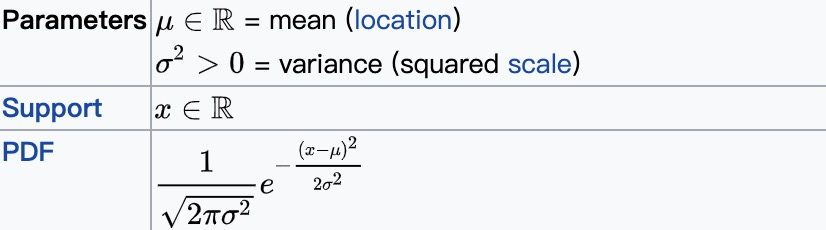

##### 3. What are the estimates of these parameters? Use the class mid-points of 27, 29, ... 39 for your calculation.

In [3]:
fat = fat.with_columns('mid-points', (fat.column(0) + fat.column(1))/2)
fat

lb,ub,"numberOfObs in [lb,ub)",mid-points
26,28,7,27
28,30,22,29
30,32,36,31
32,34,45,33
34,36,33,35
36,38,28,37
38,40,4,39


In [4]:
mean = (fat.column(2) * fat.column(3)).sum() /  fat.column(2).sum()
mean

33.0

In [5]:
variance = (fat.column(2)*((mean - fat.column(3)) ** 2)).sum() / (fat.column(2).sum()-1)
variance

8.459770114942529

##### 4. What are the expected frequencies (expected probability) for each categories of the data? Add this as a new column to the table.

This might be helpful: Let $X$ be a normal distribution with mean $\mu$ and variance $\sigma^2$. Then, the probability $\mathbb{P}(a\le X\le b)$ can be computed using

* stats.norm.cdf(b, $\mu$, $\sigma$) - stats.norm.cdf(a, $\mu$, $\sigma$) 

In [6]:
fat1 = fat.with_column('expected frequencies', stats.norm.cdf(fat.column('ub'),mean,variance**(1/2))
                      - stats.norm.cdf(fat.column('lb'),mean,variance**(1/2)))
fat1

lb,ub,"numberOfObs in [lb,ub)",mid-points,expected frequencies
26,28,7,27,0.0347528
28,30,22,29,0.108367
30,32,36,31,0.214326
32,34,45,33,0.269012
34,36,33,35,0.214326
36,38,28,37,0.108367
38,40,4,39,0.0347528


##### 5. For complete analysis, add to the table two additional categories: 
* $(-\infty, 26)$ 
* $[40, \infty)$.

In [7]:
fat2 = fat1.with_row(make_array(40, math.inf, 0, 0,0))
fat3 = fat2.with_row(make_array(-math.inf,26,0, 0,0)).sort('lb')
fat3

lb,ub,"numberOfObs in [lb,ub)",mid-points,expected frequencies
-inf,26,0,0,0
26,28,7,27,0.0347528
28,30,22,29,0.108367
30,32,36,31,0.214326
32,34,45,33,0.269012
34,36,33,35,0.214326
36,38,28,37,0.108367
38,40,4,39,0.0347528
40,inf,0,0,0


In [8]:
fat4 = fat3.with_column('expected frequencies', stats.norm.cdf(fat3.column('ub'),mean,variance**(1/2))
                      - stats.norm.cdf(fat3.column('lb'),mean,variance**(1/2)))
fat4

lb,ub,"numberOfObs in [lb,ub)",mid-points,expected frequencies
-inf,26,0,0,0.00804908
26,28,7,27,0.0347528
28,30,22,29,0.108367
30,32,36,31,0.214326
32,34,45,33,0.269012
34,36,33,35,0.214326
36,38,28,37,0.108367
38,40,4,39,0.0347528
40,inf,0,0,0.00804908


##### 6. What are the expected counts for each category of the data? Add this as a new column to the table.

In [9]:
fat5 = fat4.with_column('expected number', (fat4.column(2).sum())*fat4.column(4))
fat5

lb,ub,"numberOfObs in [lb,ub)",mid-points,expected frequencies,expected number
-inf,26,0,0,0.00804908,1.40859
26,28,7,27,0.0347528,6.08173
28,30,22,29,0.108367,18.9641
30,32,36,31,0.214326,37.507
32,34,45,33,0.269012,47.0771
34,36,33,35,0.214326,37.507
36,38,28,37,0.108367,18.9641
38,40,4,39,0.0347528,6.08173
40,inf,0,0,0.00804908,1.40859


##### 7. Clean the table so that it only has four columns:
* lb,
* ub,
* expected number,
* observed number. 

If the expected number of oberservation is less than 5 for one category, combine it with the category adjacent to it.

In [10]:
fat6 = fat5.drop(3,4)
fat7 = fat6.relabeled(2,'observed number')
fat8 = fat7.with_row(make_array(38,math.inf,4,fat7.row(7)[3]+fat7.row(8)[3])).with_row(
                     make_array(-math.inf,28,7,fat7.row(0)[3]+fat7.row(1)[3]))
fat9 = fat8.take([2,3,4,5,6,9,10]).sort('lb')
fat9

lb,ub,observed number,expected number
-inf,28,7,7.49032
28,30,22,18.9641
30,32,36,37.507
32,34,45,47.0771
34,36,33,37.507
36,38,28,18.9641
38,inf,4,7.49032


##### 8. Compute the test statistic.

In [11]:
Q = np.sum((fat9.column('observed number') 
            - fat9.column('expected number'))**2 / fat9.column('expected number'))
Q

7.143586239685517

##### 9. What is the degree of freedom?

the number of categories k = 7

the number of parameters for the normal distribution p = 2

Degree of freedom is now k-1-p = 7-1-2 = 4



In [12]:
df = 7-1-2
df

4

##### 10. What is the p-value and what is your conclusion?

In [13]:
pval = stats.chi2.sf(Q, df)
pval

0.12849212965903417

Since p-value is more than 0.05, we do not have enough evidence to reject the null hypothesis. That is, the data follows the normal distribution.

# Problem 2. 

A sample of adults in Eastern and Central Newfoundland was conducted early in 1988 to examine public attitudes toward government cuts in social spending. Some of the results from this study are described in Morris Saldov, “Public Attitudes to Social Spending in Newfoundland,” Canadian Review of Social Policy, 26, November 1990, pages 10-14. The data is represented in the table below:

<img width=400px src='welfare.png'>

Concerning this data, the
author comments,

* "Respondents who knew someone on social assistance, were more likely to feel that welfare rates were too low, ... "

##### 1. Can we conduct a test of independence here, or is it that we can only carry out a test of homogeneity?

We can conduct a test of independence.

Observational units are collected at random from a single sample and two categorical variables are observed for each unit. 

##### 2. Depending on your answer for 1., what are the null and alternative hypotheses?

H0: variables of knowing someone on social assistance and attitutes toward welfare spending are independent 

H1: variables of knowing someone on social assistance and attitutes toward welfare spending are not independent

##### 3. Compute the test statistic.

In [14]:
observed_margin = make_array([40,6,46], [16,13,29], [9,7,16], [65,26,91])
observed_margin

array([[40,  6, 46],
       [16, 13, 29],
       [ 9,  7, 16],
       [65, 26, 91]])

In [15]:
observed = observed_margin[:3, :2]
observed

array([[40,  6],
       [16, 13],
       [ 9,  7]])

In [16]:
nrows = 3
ncols = 2
expected = np.zeros((nrows,ncols))   #initialization
for i in np.arange(nrows):
    for j in np.arange(ncols):
        expected[i,j] = observed_margin[i,ncols]*observed_margin[nrows,j]/observed_margin[nrows,ncols]
expected

array([[32.85714286, 13.14285714],
       [20.71428571,  8.28571429],
       [11.42857143,  4.57142857]])

In [17]:
Q = ((expected-observed)**2/expected).sum()
Q

10.996205022488756

##### 4. What is the degree of freedom?

In [18]:
df = (nrows-1)*(ncols-1)
df

2

##### 5. What is the p-value and what is your conclusion?

In [19]:
pval = stats.chi2.sf(Q, df)
pval

0.004094533403106778

Since p-value is less than 0.05, we can reject the null hypothesis and conclude that the public attitudes toward government cuts in social spending depends on whether they knew someone on social assistance.